<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Metrics" data-toc-modified-id="Metrics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Metrics</a></span></li><li><span><a href="#Example-data-on-2021-04-24" data-toc-modified-id="Example-data-on-2021-04-24-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example data on 2021-04-24</a></span><ul class="toc-item"><li><span><a href="#Result-loading" data-toc-modified-id="Result-loading-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Result loading</a></span></li><li><span><a href="#Crowd-related-metrics" data-toc-modified-id="Crowd-related-metrics-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Crowd-related metrics</a></span></li><li><span><a href="#Path-Efficiency-related-metrics" data-toc-modified-id="Path-Efficiency-related-metrics-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Path Efficiency-related metrics</a></span></li><li><span><a href="#Shared-control-related-metrics" data-toc-modified-id="Shared-control-related-metrics-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Shared control-related metrics</a></span></li></ul></li><li><span><a href="#Example-data-on-2021-04-10" data-toc-modified-id="Example-data-on-2021-04-10-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Example data on 2021-04-10</a></span><ul class="toc-item"><li><span><a href="#Result-loading" data-toc-modified-id="Result-loading-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Result loading</a></span></li><li><span><a href="#Crowd-related-metrics" data-toc-modified-id="Crowd-related-metrics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Crowd-related metrics</a></span></li><li><span><a href="#Path-Efficiency-related-metrics" data-toc-modified-id="Path-Efficiency-related-metrics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Path Efficiency-related metrics</a></span></li><li><span><a href="#Shared-control-related-metrics" data-toc-modified-id="Shared-control-related-metrics-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Shared control-related metrics</a></span></li></ul></li><li><span><a href="#Comparison-of-all-control-type-between-0410-and-0424" data-toc-modified-id="Comparison-of-all-control-type-between-0410-and-0424-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison of all control type between 0410 and 0424</a></span><ul class="toc-item"><li><span><a href="#Result-loading" data-toc-modified-id="Result-loading-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Result loading</a></span></li><li><span><a href="#Crowd-related-metrics" data-toc-modified-id="Crowd-related-metrics-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Crowd-related metrics</a></span></li><li><span><a href="#Path-Efficiency-related-metrics" data-toc-modified-id="Path-Efficiency-related-metrics-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Path Efficiency-related metrics</a></span></li><li><span><a href="#Shared-control-related-metrics" data-toc-modified-id="Shared-control-related-metrics-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Shared control-related metrics</a></span></li><li><span><a href="#Analysis-without-group" data-toc-modified-id="Analysis-without-group-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Analysis without group</a></span></li></ul></li><li><span><a href="#Comparison-between-shared_control-on-0325,-0410-and-0424" data-toc-modified-id="Comparison-between-shared_control-on-0325,-0410-and-0424-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparison between shared_control on 0325, 0410 and 0424</a></span><ul class="toc-item"><li><span><a href="#Result-loading" data-toc-modified-id="Result-loading-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Result loading</a></span></li><li><span><a href="#Shared-control-metrics" data-toc-modified-id="Shared-control-metrics-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Shared control metrics</a></span></li></ul></li></ul></div>

# Crowd navigation evaluation

> Analysis of different control methods on different datas

In [1]:
import math
import collections
import urllib.request
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.ioff()
import seaborn as sns
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 1.3})

import sys, os, fnmatch
# Importing Metrics Functions:
# sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'src'))
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'qolo'))

from crowd_evaluation import *
from crowdbot_data import CrowdBotData, CrowdBotDatabase
from notebook_util import walk, violinplot, categorical_plot

# %matplotlib inline

In [2]:
qolo_dataset = CrowdBotData()

bagbase = qolo_dataset.bagbase_dir
outbase = qolo_dataset.outbase_dir

print("rosbag database:", bagbase)
print(os.listdir(bagbase))
print()
print("output database:", outbase)
print(os.listdir(outbase))

control_types = ['mds', 'rds', 'shared_control']

rosbag database: /hdd/data_qolo/crowd_qolo_recordings/
['0325_rds', '0325_shared_control', '0325_test', '0327_shared_control', '0327_test', '0410_mds', '0410_rds', '0410_shared_control', '0424_mds', '0424_rds', '0424_shared_control', '1203_test', 'MDS', 'new', 'RDS', 'readme.md', 'shared_control', 'shared_test']

output database: /hdd/data_qolo/crowdbot_data_analysis/
['0325_shared_control_processed', '0325_test_processed', '0327_shared_control_processed', '0410_mds_processed', '0410_rds_processed', '0410_r_d_s_issues', '0410_shared_control_processed', '0424_mds_processed', '0424_rds_processed', '0424_shared_control_processed', '1203_manual_processed', '1203_shared_control_processed', '1203_test_processed', 'apply_low_pass', 'MDS_processed', 'shared_test_processed', 'test_processed']


In [3]:
#!sh data_export_pipeline.sh -e=py38cuda110 -t=shared_test

## Metrics

1. Crowd-related

    1. (Main) Crowd Density (within an area of 10m around the robot):

    2. (Main) Minimal distance to pedestrians: mean+SD: 

    3. Normalized proximity to surrounding pedestrians : SD(d1..dn) / avg(d1...dn)
    
2. Path efficiency-related

    1. Relative time to goal (normalized by the goal distance)
    2. Relative path length (normalized by the goal distance in straight line): 

3. Control-related

    1. Agreement
    2. Fluency
    3. Relative Jerk (smoothness of the path as added sum of linear and angular jerk)

## Example data on 2021-04-24

In [4]:
chosen_dates = ['0424']
chosen_type = ['mds', 'rds', 'shared_control']

eval_dirs = []

for root, dirs, files in walk(outbase, topdown=False, maxdepth=1):
    for dir_ in dirs:
        if any(s in dir_ for s in chosen_dates) and any(s in dir_ for s in chosen_type):
            dir_ = dir_.replace("_processed", "")
            eval_dirs.append(dir_)
            print("{}/ is available!".format(dir_))

0424_mds/ is available!
0424_rds/ is available!
0424_shared_control/ is available!


In [5]:
# for eval_dir in eval_dirs:
eval_dir = eval_dirs[0]
print("Reading results from {}".format(eval_dir))

# new a CrowdBotDatabase() instance
eval_database = CrowdBotDatabase(classdir=eval_dir)

Reading results from 0424_mds


In [6]:
print("Available sequences in {}:\n{}".format(eval_dir, eval_database.seqs))

Available sequences in 0424_mds:
['2021-04-24-12-04-04', '2021-04-24-12-07-57', '2021-04-24-12-10-45', '2021-04-24-12-54-04', '2021-04-24-12-56-59', '2021-04-24-13-03-39']


### Result loading

In [7]:
crowd_metrics = (
    'avg_crowd_density5',
    'std_crowd_density5',
    'max_crowd_density5',
    'avg_min_dist',
)
"""
To added crowd_metrics
avg_crowd_density2_5
std_crowd_density2_5
max_crowd_density2_5
virtual_collision
"""

path_metrics = (
    'rel_duration2goal',
    'rel_path_length2goal',
    'path_length2goal',
    'duration2goal',
    'min_dist2goal',
)

control_metrics = (
    'rel_jerk',
    'avg_fluency',
    'contribution',
    'avg_agreement',
)

frames = []

for eval_dir in eval_dirs:

    print("Reading results from {}".format(eval_dir))

    # new a CrowdBotDatabase() instance
    eval_database = CrowdBotDatabase(classdir=eval_dir)

    eval_dict = {'seq': eval_database.seqs}
    eval_dict.update(
        {'control_type': [eval_dir[5:] for i in range(eval_database.nr_seqs())]}
    )

    eval_dict.update({k: [] for k in crowd_metrics})
    eval_dict.update({k: [] for k in path_metrics})
    eval_dict.update({k: [] for k in control_metrics})

    for idx, seq in enumerate(eval_database.seqs):
        eval_res_dir = os.path.join(eval_database.metrics_dir)

        crowd_eval_npy = os.path.join(eval_res_dir, seq + "_crowd_eval.npy")
        crowd_eval_dict = np.load(
            crowd_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(crowd_metrics):
            eval_dict[crowd_metrics[iidx]].append(crowd_eval_dict[val])

        path_eval_npy = os.path.join(eval_res_dir, seq + "_path_eval.npy")
        path_eval_dict = np.load(
            path_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(path_metrics):
            eval_dict[path_metrics[iidx]].append(path_eval_dict[val])

        qolo_eval_npy = os.path.join(eval_res_dir, seq + "_qolo_eval.npy")
        qolo_eval_dict = np.load(
            qolo_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(control_metrics):
            eval_dict[control_metrics[iidx]].append(qolo_eval_dict[val])

    eval_df = pd.DataFrame(eval_dict)
    eval_df.columns = (
        ['seq', 'control_type']
        + list(crowd_metrics)
        + list(path_metrics)
        + list(control_metrics)
    )

    # Filter path_length2goal less than 5 meter
    eval_df = eval_df[eval_df.path_length2goal >= 5.0]

    frames.append(eval_df)

eval_res_df = pd.concat(frames, ignore_index=True)

Reading results from 0424_mds
Reading results from 0424_rds
Reading results from 0424_shared_control


In [8]:
eval_res_df.head()

,seq,control_type,avg_crowd_density5,std_crowd_density5,max_crowd_density5,avg_min_dist,rel_duration2goal,rel_path_length2goal,path_length2goal,duration2goal,min_dist2goal,rel_jerk,avg_fluency,contribution,avg_agreement
0,2021-04-24-12-04-04,mds,0.120290,0.062418,0.267380,1.009510,0.234474,1.344630,20.609072,81.709337,4.631525,-0.011853,0.965954,0.558885,0.699796
1,2021-04-24-12-07-57,mds,0.093233,0.064838,0.305577,1.515852,0.442688,1.566391,31.204075,56.250129,0.285780,2.428843,0.973126,0.655099,0.673129
2,2021-04-24-12-10-45,mds,0.149362,0.065137,0.343775,1.032375,0.292015,1.490112,25.521812,73.315837,3.395524,0.804337,0.965520,0.603494,0.752797
3,2021-04-24-12-54-04,mds,0.114009,0.066268,0.318310,1.200191,0.257715,1.805848,29.684841,79.730328,3.624111,0.005464,0.967496,0.639752,0.726332
4,2021-04-24-12-56-59,mds,0.137841,0.048663,0.318310,1.032917,0.190793,1.797216,20.827414,75.924780,8.249085,0.001597,0.969001,0.540386,0.739734


### Crowd-related metrics

In [9]:
crowd_metrics_df = eval_res_df[['seq', 'control_type'] + list(crowd_metrics)]

- choose specific control type from final dataframe

In [10]:
crowd_metrics_df[crowd_metrics_df.control_type == 'shared_control']

,seq,control_type,avg_crowd_density5,std_crowd_density5,max_crowd_density5,avg_min_dist
13,2021-04-24-13-07-54,shared_control,0.149252,0.062425,0.369239,1.029409
14,2021-04-24-13-11-03,shared_control,0.140995,0.058301,0.369239,1.078650
15,2021-04-24-13-14-49,shared_control,0.157753,0.062446,0.331042,1.036949
16,2021-04-24-13-16-58,shared_control,0.169079,0.064772,0.394704,1.025058
17,2021-04-24-13-20-05,shared_control,0.165287,0.071586,0.369239,1.003949
18,2021-04-24-13-22-52,shared_control,0.141218,0.054297,0.331042,0.951831
19,2021-04-24-13-22-52-002,shared_control,0.141218,0.054297,0.331042,0.947935
20,2021-04-24-13-25-24-001,shared_control,0.132688,0.063152,0.318310,1.222095
21,2021-04-24-13-27-09-003,shared_control,0.114643,0.059530,0.292845,1.255698


- calculate std and mean according to `control_type`

In [11]:
for ctrl in control_types:
    print("###", ctrl)
    print("# mean")
    print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].mean(numeric_only=True))
    # print("# std")
    # print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].std(numeric_only=True))
    print()

### mds
# mean
avg_crowd_density5    0.127617
std_crowd_density5    0.057925
max_crowd_density5    0.301333
avg_min_dist          1.149770
dtype: float64

### rds
# mean
avg_crowd_density5    0.146772
std_crowd_density5    0.064521
max_crowd_density5    0.338318
avg_min_dist          0.957482
dtype: float64

### shared_control
# mean
avg_crowd_density5    0.145792
std_crowd_density5    0.061201
max_crowd_density5    0.345189
avg_min_dist          1.061286
dtype: float64



- using sns.violinplot/boxplot

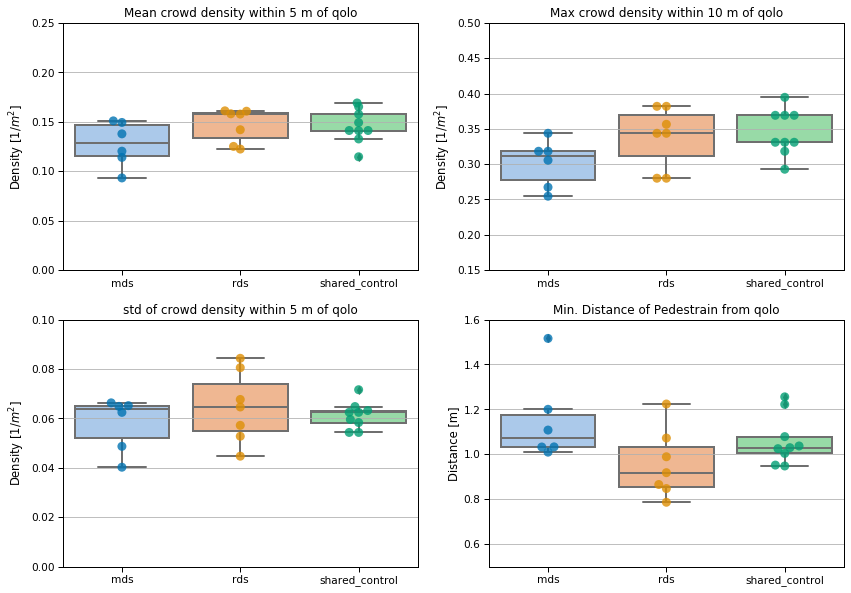

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

categorical_plot(
    axes=axes[0,0],
    df=crowd_metrics_df,
    metric='avg_crowd_density5',
    catogory='control_type',
    title='Mean crowd density within 5 m of qolo',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.00, 0.25],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)
categorical_plot(
    axes=axes[0,1],
    df=crowd_metrics_df,
    metric='max_crowd_density5',
    catogory='control_type',
    title='Max crowd density within 10 m of qolo',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.15, 0.50],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

categorical_plot(
    axes=axes[1,0],
    df=crowd_metrics_df,
    metric='std_crowd_density5',
    catogory='control_type',
    title='std of crowd density within 5 m of qolo',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 0.1],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

categorical_plot(
    axes=axes[1,1],
    df=crowd_metrics_df,
    metric='avg_min_dist',
    catogory='control_type',
    title='Min. Distance of Pedestrain from qolo',
    xlabel='',
    ylabel='Distance [m]',
    ylim=[0.5, 1.6],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

plt.savefig("0424_crowd.pdf", dpi=300)

plt.show()

In [13]:
plt.close()

### Path Efficiency-related metrics

- eval code

In [14]:
path_metrics_df = eval_res_df[['seq', 'control_type'] + list(path_metrics)]

- choose specific control type from final dataframe

In [15]:
path_metrics_df[path_metrics_df.control_type == 'shared_control']

,seq,control_type,rel_duration2goal,rel_path_length2goal,path_length2goal,duration2goal,min_dist2goal
13,2021-04-24-13-07-54,shared_control,0.247911,1.305326,18.816889,50.081827,6.440260
14,2021-04-24-13-11-03,shared_control,0.362650,1.449236,26.770664,47.756119,2.827538
15,2021-04-24-13-14-49,shared_control,0.233189,1.398963,17.272263,47.921671,7.789627
16,2021-04-24-13-16-58,shared_control,0.309931,1.218381,25.977917,56.751439,2.946275
17,2021-04-24-13-20-05,shared_control,0.287084,1.644409,28.864761,54.782662,4.458249
18,2021-04-24-13-22-52,shared_control,0.202016,1.338625,19.590395,76.341897,4.854780
19,2021-04-24-13-22-52-002,shared_control,0.202016,1.338625,19.590395,76.341897,4.854780
20,2021-04-24-13-25-24-001,shared_control,0.299017,1.453586,21.852699,52.034866,17.468876
21,2021-04-24-13-27-09-003,shared_control,0.166739,2.777796,57.629929,97.016215,4.061659


In [16]:
for ctrl in control_types:
    print("###", ctrl)
    print("# mean")
    print(path_metrics_df[path_metrics_df.control_type == ctrl].mean(numeric_only=True))
    print("# std")
    print(path_metrics_df[path_metrics_df.control_type == ctrl].std(numeric_only=True))
    print()

### mds
# mean
rel_duration2goal        0.272513
rel_path_length2goal     1.545478
path_length2goal        22.745275
duration2goal           67.669832
min_dist2goal            5.610127
dtype: float64
# std
rel_duration2goal        0.090247
rel_path_length2goal     0.224333
path_length2goal         8.186058
duration2goal           16.672627
min_dist2goal            4.625392
dtype: float64

### rds
# mean
rel_duration2goal        0.337834
rel_path_length2goal     1.342999
path_length2goal        18.981937
duration2goal           55.745466
min_dist2goal            6.217194
dtype: float64
# std
rel_duration2goal        0.147670
rel_path_length2goal     0.259667
path_length2goal         6.585642
duration2goal           16.949095
min_dist2goal            4.569436
dtype: float64

### shared_control
# mean
rel_duration2goal        0.256728
rel_path_length2goal     1.547216
path_length2goal        26.262880
duration2goal           62.114288
min_dist2goal            6.189116
dtype: float64
# std

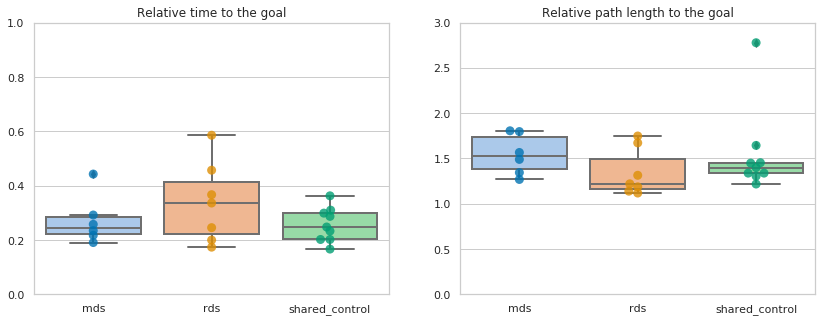

In [17]:
path_fig, path_axes = plt.subplots(1, 2, figsize=(14, 5))

categorical_plot(
    axes=path_axes[0],
    df=path_metrics_df,
    metric='rel_duration2goal',
    catogory='control_type',
    title='Relative time to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=path_axes[1],
    df=path_metrics_df,
    metric='rel_path_length2goal',
    catogory='control_type',
    title='Relative path length to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 3.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

plt.savefig("0424_path_efficiency.pdf", dpi=300)

plt.show()

In [18]:
plt.close()

### Shared control-related metrics

In [19]:
control_metrics_df = eval_res_df[['seq', 'control_type'] + list(control_metrics)]

- choose specific control type from final dataframe

In [20]:
control_metrics_df[control_metrics_df.control_type == 'shared_control']

,seq,control_type,rel_jerk,avg_fluency,contribution,avg_agreement
13,2021-04-24-13-07-54,shared_control,-0.011045,0.968464,0.491660,0.843480
14,2021-04-24-13-11-03,shared_control,-0.013482,0.964516,0.393203,0.868939
15,2021-04-24-13-14-49,shared_control,0.004402,0.965989,0.637247,0.864970
16,2021-04-24-13-16-58,shared_control,0.007147,0.964971,0.573797,0.861029
17,2021-04-24-13-20-05,shared_control,0.007419,0.960990,0.532711,0.857360
18,2021-04-24-13-22-52,shared_control,0.004444,0.949538,0.660711,0.825794
19,2021-04-24-13-22-52-002,shared_control,0.004444,0.949538,0.660711,0.825794
20,2021-04-24-13-25-24-001,shared_control,-0.013103,0.961573,0.472888,0.859187
21,2021-04-24-13-27-09-003,shared_control,-0.065225,0.964998,0.506332,0.857786


In [21]:
for ctrl in control_types:
    print("###", ctrl)
    print("# mean")
    print(control_metrics_df[control_metrics_df.control_type == ctrl].mean(numeric_only=True))
    print("# std")
    print(control_metrics_df[control_metrics_df.control_type == ctrl].std(numeric_only=True))
    print()

### mds
# mean
rel_jerk         0.538413
avg_fluency      0.969686
contribution     0.570865
avg_agreement    0.710876
dtype: float64
# std
rel_jerk         0.980519
avg_fluency      0.004521
contribution     0.083079
avg_agreement    0.033989
dtype: float64

### rds
# mean
rel_jerk         2.164607
avg_fluency      0.992877
contribution     0.900390
avg_agreement    0.732367
dtype: float64
# std
rel_jerk         5.689538
avg_fluency      0.003506
contribution     0.133523
avg_agreement    0.033122
dtype: float64

### shared_control
# mean
rel_jerk        -0.008333
avg_fluency      0.961175
contribution     0.547696
avg_agreement    0.851593
dtype: float64
# std
rel_jerk         0.023102
avg_fluency      0.006960
contribution     0.092726
avg_agreement    0.016183
dtype: float64



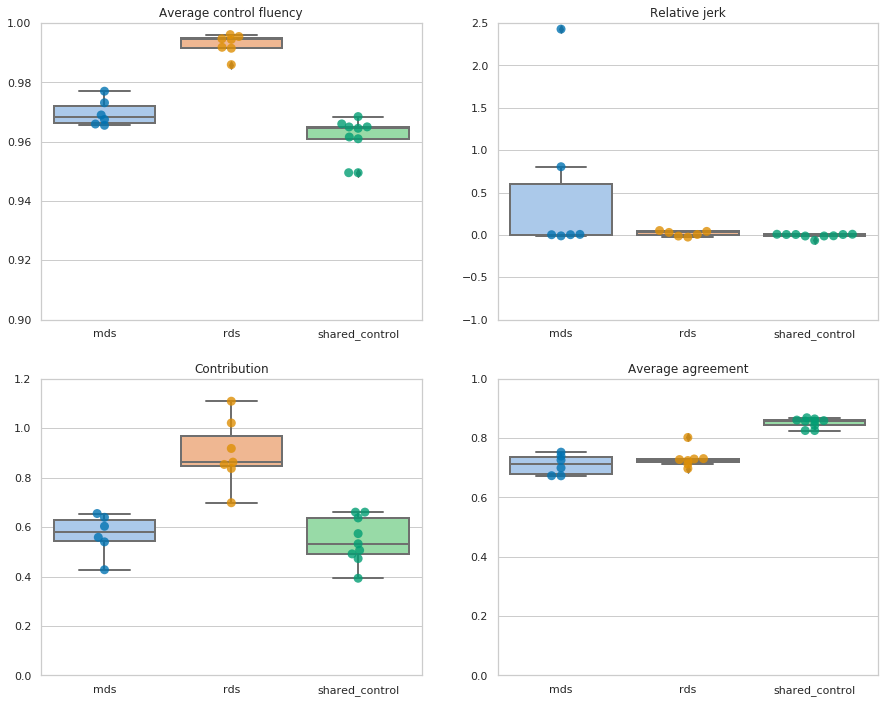

In [22]:
control_fig, control_axes = plt.subplots(2, 2, figsize=(15, 12))

categorical_plot(
    axes=control_axes[0,0],
    df=control_metrics_df,
    metric='avg_fluency',
    catogory='control_type',
    title='Average control fluency',
    xlabel='',
    ylabel='',
    ylim=[0.90, 1.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=control_axes[0,1],
    df=control_metrics_df,
    metric='rel_jerk',
    catogory='control_type',
    title='Relative jerk',
    xlabel='',
    ylabel='',
    ylim=[-1.0, 2.5],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,0],
    df=control_metrics_df,
    metric='contribution',
    catogory='control_type',
    title='Contribution',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.2],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,1],
    df=control_metrics_df,
    metric='avg_agreement',
    catogory='control_type',
    title='Average agreement',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

plt.savefig("0424_control.pdf", dpi=300)

plt.show()

In [23]:
plt.close()

## Example data on 2021-04-10

In [24]:
chosen_dates = ['0410']
chosen_type = ['mds', 'rds', 'shared_control']

eval_dirs = []

for root, dirs, files in walk(outbase, topdown=False, maxdepth=1):
    for dir_ in dirs:
        if any(s in dir_ for s in chosen_dates) and any(s in dir_ for s in chosen_type):
            dir_ = dir_.replace("_processed", "")
            eval_dirs.append(dir_)
            print("{}/ is available!".format(dir_))

0410_mds/ is available!
0410_rds/ is available!
0410_shared_control/ is available!


### Result loading

In [25]:
crowd_metrics = (
    'avg_crowd_density5',
    'std_crowd_density5',
    'max_crowd_density5',
    'avg_min_dist',
)
"""
To added crowd_metrics
avg_crowd_density2_5
std_crowd_density2_5
max_crowd_density2_5
virtual_collision
"""

path_metrics = (
    'rel_duration2goal',
    'rel_path_length2goal',
    'path_length2goal',
    'duration2goal',
    'min_dist2goal',
)

control_metrics = (
    'rel_jerk',
    'avg_fluency',
    'contribution',
    'avg_agreement',
)

frames = []

for eval_dir in eval_dirs:

    print("Reading results from {}".format(eval_dir))

    # new a CrowdBotDatabase() instance
    eval_database = CrowdBotDatabase(classdir=eval_dir)

    eval_dict = {'seq': eval_database.seqs}
    eval_dict.update(
        {'control_type': [eval_dir[5:] for i in range(eval_database.nr_seqs())]}
    )

    eval_dict.update({k: [] for k in crowd_metrics})
    eval_dict.update({k: [] for k in path_metrics})
    eval_dict.update({k: [] for k in control_metrics})

    for idx, seq in enumerate(eval_database.seqs):
        eval_res_dir = os.path.join(eval_database.metrics_dir)

        crowd_eval_npy = os.path.join(eval_res_dir, seq + "_crowd_eval.npy")
        crowd_eval_dict = np.load(
            crowd_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(crowd_metrics):
            eval_dict[crowd_metrics[iidx]].append(crowd_eval_dict[val])

        path_eval_npy = os.path.join(eval_res_dir, seq + "_path_eval.npy")
        path_eval_dict = np.load(
            path_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(path_metrics):
            eval_dict[path_metrics[iidx]].append(path_eval_dict[val])

        qolo_eval_npy = os.path.join(eval_res_dir, seq + "_qolo_eval.npy")
        qolo_eval_dict = np.load(
            qolo_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(control_metrics):
            eval_dict[control_metrics[iidx]].append(qolo_eval_dict[val])

    eval_df = pd.DataFrame(eval_dict)
    eval_df.columns = (
        ['seq', 'control_type']
        + list(crowd_metrics)
        + list(path_metrics)
        + list(control_metrics)
    )

    # Filter path_length2goal less than 5 meter
    eval_df = eval_df[eval_df.path_length2goal >= 5.0]

    frames.append(eval_df)

eval_res_df = pd.concat(frames, ignore_index=True)

Reading results from 0410_mds
Reading results from 0410_rds
Reading results from 0410_shared_control


### Crowd-related metrics

In [26]:
crowd_metrics_df = eval_res_df[['seq', 'control_type'] + list(crowd_metrics)]

In [27]:
for ctrl in control_types:
    print("###", ctrl)
    print("# mean")
    print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].mean(numeric_only=True))
    # print("# std")
    # print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].std(numeric_only=True))
    print()

### mds
# mean
avg_crowd_density5    0.110323
std_crowd_density5    0.045033
max_crowd_density5    0.250828
avg_min_dist          1.185817
dtype: float64

### rds
# mean
avg_crowd_density5    0.116271
std_crowd_density5    0.045129
max_crowd_density5    0.255627
avg_min_dist          1.090529
dtype: float64

### shared_control
# mean
avg_crowd_density5    0.105671
std_crowd_density5    0.043323
max_crowd_density5    0.253056
avg_min_dist          1.302759
dtype: float64



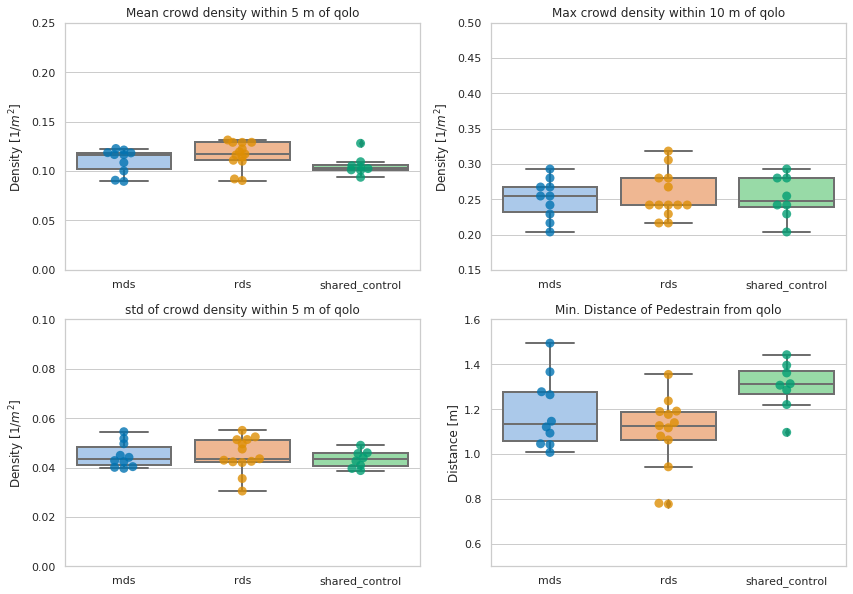

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

categorical_plot(
    axes=axes[0,0],
    df=crowd_metrics_df,
    metric='avg_crowd_density5',
    catogory='control_type',
    title='Mean crowd density within 5 m of qolo',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.00, 0.25],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)
categorical_plot(
    axes=axes[0,1],
    df=crowd_metrics_df,
    metric='max_crowd_density5',
    catogory='control_type',
    title='Max crowd density within 10 m of qolo',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.15, 0.50],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

categorical_plot(
    axes=axes[1,0],
    df=crowd_metrics_df,
    metric='std_crowd_density5',
    catogory='control_type',
    title='std of crowd density within 5 m of qolo',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 0.1],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

categorical_plot(
    axes=axes[1,1],
    df=crowd_metrics_df,
    metric='avg_min_dist',
    catogory='control_type',
    title='Min. Distance of Pedestrain from qolo',
    xlabel='',
    ylabel='Distance [m]',
    ylim=[0.5, 1.6],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

plt.savefig("0424_crowd.pdf", dpi=300)

plt.show()

In [29]:
plt.close()

### Path Efficiency-related metrics

In [30]:
path_metrics_df = eval_res_df[['seq', 'control_type'] + list(path_metrics)]

In [31]:
for ctrl in control_types:
    print("###", ctrl)
    print("# mean")
    print(path_metrics_df[path_metrics_df.control_type == ctrl].mean(numeric_only=True))
    print("# std")
    print(path_metrics_df[path_metrics_df.control_type == ctrl].std(numeric_only=True))
    print()

### mds
# mean
rel_duration2goal        0.288190
rel_path_length2goal     1.325668
path_length2goal        20.854128
duration2goal           72.082702
min_dist2goal            4.223129
dtype: float64
# std
rel_duration2goal        0.097573
rel_path_length2goal     0.150616
path_length2goal         4.432791
duration2goal           14.085057
min_dist2goal            3.819822
dtype: float64

### rds
# mean
rel_duration2goal        0.310687
rel_path_length2goal     1.331261
path_length2goal        21.252422
duration2goal           67.401774
min_dist2goal            7.038408
dtype: float64
# std
rel_duration2goal        0.068729
rel_path_length2goal     0.170277
path_length2goal         6.289336
duration2goal           22.513109
min_dist2goal           12.345414
dtype: float64

### shared_control
# mean
rel_duration2goal        0.323986
rel_path_length2goal     1.458339
path_length2goal        28.225304
duration2goal           57.129754
min_dist2goal            2.835881
dtype: float64
# std

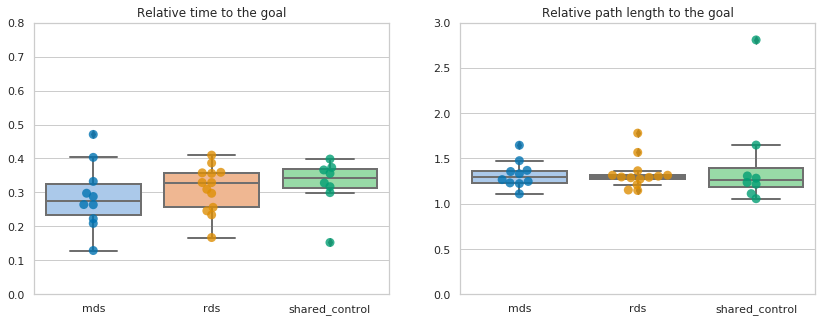

In [32]:
path_fig, path_axes = plt.subplots(1, 2, figsize=(14, 5))

categorical_plot(
    axes=path_axes[0],
    df=path_metrics_df,
    metric='rel_duration2goal',
    catogory='control_type',
    title='Relative time to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 0.8],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=path_axes[1],
    df=path_metrics_df,
    metric='rel_path_length2goal',
    catogory='control_type',
    title='Relative path length to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 3.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

plt.savefig("0410_path_efficiency.pdf", dpi=300)

plt.show()

In [33]:
plt.close()

### Shared control-related metrics

In [34]:
control_metrics_df = eval_res_df[['seq', 'control_type'] + list(control_metrics)]

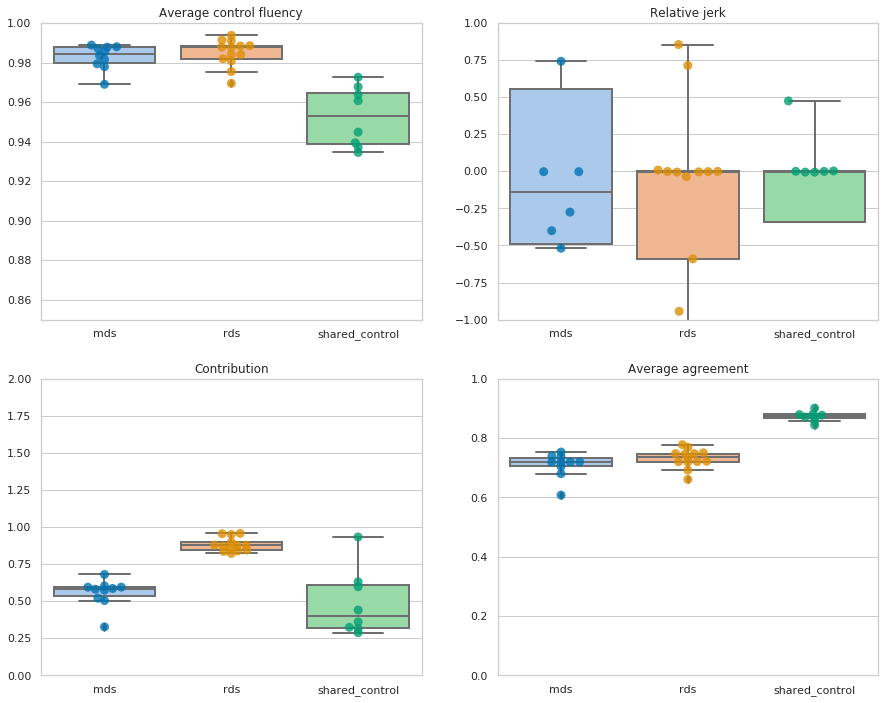

In [35]:
control_fig, control_axes = plt.subplots(2, 2, figsize=(15, 12))

categorical_plot(
    axes=control_axes[0,0],
    df=control_metrics_df,
    metric='avg_fluency',
    catogory='control_type',
    title='Average control fluency',
    xlabel='',
    ylabel='',
    ylim=[0.85, 1.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=control_axes[0,1],
    df=control_metrics_df,
    metric='rel_jerk',
    catogory='control_type',
    title='Relative jerk',
    xlabel='',
    ylabel='',
    ylim=[-1.0, 1.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,0],
    df=control_metrics_df,
    metric='contribution',
    catogory='control_type',
    title='Contribution',
    xlabel='',
    ylabel='',
    ylim=[0.0, 2.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,1],
    df=control_metrics_df,
    metric='avg_agreement',
    catogory='control_type',
    title='Average agreement',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    # lgd_labels=['Not reached', 'Reached'],
    # group='goal_reached',
    kind='box',
)

plt.savefig("0410_control.pdf", dpi=300)

plt.show()

In [36]:
plt.close()

## Comparison of all control type between 0410 and 0424

### Result loading

In [37]:
chosen_dates = ['0410', '0424']
chosen_type = ['mds', 'rds', 'shared_control']

eval_dirs = []

for root, dirs, files in walk(outbase, topdown=False, maxdepth=1):
    for dir_ in dirs:
        if any(s in dir_ for s in chosen_dates) and any(s in dir_ for s in chosen_type):
            dir_ = dir_.replace("_processed", "")
            eval_dirs.append(dir_)
            print("{}/ is available!".format(dir_))

0410_mds/ is available!
0410_rds/ is available!
0410_shared_control/ is available!
0424_mds/ is available!
0424_rds/ is available!
0424_shared_control/ is available!


In [38]:
crowd_metrics = (
    'avg_crowd_density5',
    'std_crowd_density5',
    'max_crowd_density5',
    'avg_min_dist',
)
"""
To added crowd_metrics
avg_crowd_density2_5
std_crowd_density2_5
max_crowd_density2_5
virtual_collision
"""

path_metrics = (
    'rel_duration2goal',
    'rel_path_length2goal',
    'path_length2goal',
    'duration2goal',
    'min_dist2goal',
)

control_metrics = (
    'rel_jerk',
    'avg_fluency',
    'contribution',
    'avg_agreement',
)

frames = []

for eval_dir in eval_dirs:

    # extract date
    date = eval_dir[:4]
    control_type = eval_dir[5:]

    print("Reading results from {}".format(eval_dir))

    # new a CrowdBotDatabase() instance
    eval_database = CrowdBotDatabase(classdir=eval_dir)

    eval_dict = {'seq': eval_database.seqs}
    eval_dict.update(
        {'control_type': [control_type for i in range(eval_database.nr_seqs())]}
    )

    eval_dict.update({k: [] for k in crowd_metrics})
    eval_dict.update({k: [] for k in path_metrics})
    eval_dict.update({k: [] for k in control_metrics})

    for idx, seq in enumerate(eval_database.seqs):
        eval_res_dir = os.path.join(eval_database.metrics_dir)

        crowd_eval_npy = os.path.join(eval_res_dir, seq + "_crowd_eval.npy")
        crowd_eval_dict = np.load(
            crowd_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(crowd_metrics):
            eval_dict[crowd_metrics[iidx]].append(crowd_eval_dict[val])

        path_eval_npy = os.path.join(eval_res_dir, seq + "_path_eval.npy")
        path_eval_dict = np.load(
            path_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(path_metrics):
            eval_dict[path_metrics[iidx]].append(path_eval_dict[val])

        qolo_eval_npy = os.path.join(eval_res_dir, seq + "_qolo_eval.npy")
        qolo_eval_dict = np.load(
            qolo_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(control_metrics):
            eval_dict[control_metrics[iidx]].append(qolo_eval_dict[val])

    eval_df = pd.DataFrame(eval_dict)
    eval_df.columns = (
        ['seq', 'control_type']
        + list(crowd_metrics)
        + list(path_metrics)
        + list(control_metrics)
    )

    # Filter path_length2goal less than 5 meter
    eval_df = eval_df[eval_df.path_length2goal >= 5.0]
    # add date col
    eval_df['date'] = [date] * len(eval_df)

    frames.append(eval_df)

eval_res_df = pd.concat(frames, ignore_index=True)

Reading results from 0410_mds
Reading results from 0410_rds
Reading results from 0410_shared_control
Reading results from 0424_mds
Reading results from 0424_rds
Reading results from 0424_shared_control


In [39]:
eval_res_df.head()

,seq,control_type,avg_crowd_density5,std_crowd_density5,max_crowd_density5,avg_min_dist,rel_duration2goal,rel_path_length2goal,path_length2goal,duration2goal,min_dist2goal,rel_jerk,avg_fluency,contribution,avg_agreement,date
0,2021-04-10-11-28-10,mds,0.121305,0.054506,0.292845,1.093475,0.222806,1.223162,18.631451,85.456764,4.768555,14.832384,0.979406,0.574612,0.704533,0410
1,2021-04-10-11-30-57,mds,0.100127,0.049647,0.280113,1.264073,0.263975,1.331490,20.765743,73.851138,4.290847,-0.002441,0.987150,0.504906,0.720273,0410
2,2021-04-10-11-33-46,mds,0.108558,0.051738,0.267380,1.277527,0.470863,1.109684,18.319101,43.824839,3.166857,-7.801421,0.981614,0.521262,0.719699,0410
3,2021-04-10-11-36-41,mds,0.089543,0.040085,0.203718,1.366188,0.208948,1.356465,19.928324,87.888817,5.088686,-0.002508,0.987825,0.594938,0.717673,0410
4,2021-04-10-11-54-34,mds,0.122800,0.040368,0.229183,1.045963,0.129141,1.646356,10.646132,62.591449,13.899999,-0.400495,0.977925,0.327414,0.607875,0410


### Crowd-related metrics

In [40]:
crowd_metrics_df = eval_res_df[['seq', 'control_type'] + list(crowd_metrics) + ['date']]

In [41]:
for ctrl in control_types:
    print("###", ctrl)
    print("# mean")
    print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].mean(numeric_only=True))
    # print("# std")
    # print(crowd_metrics_df[crowd_metrics_df.control_type == ctrl].std(numeric_only=True))
    print()

### mds
# mean
avg_crowd_density5    0.116808
std_crowd_density5    0.049867
max_crowd_density5    0.269768
avg_min_dist          1.172299
dtype: float64

### rds
# mean
avg_crowd_density5    0.126946
std_crowd_density5    0.051916
max_crowd_density5    0.284569
avg_min_dist          1.043963
dtype: float64

### shared_control
# mean
avg_crowd_density5    0.126912
std_crowd_density5    0.052788
max_crowd_density5    0.301833
avg_min_dist          1.174920
dtype: float64



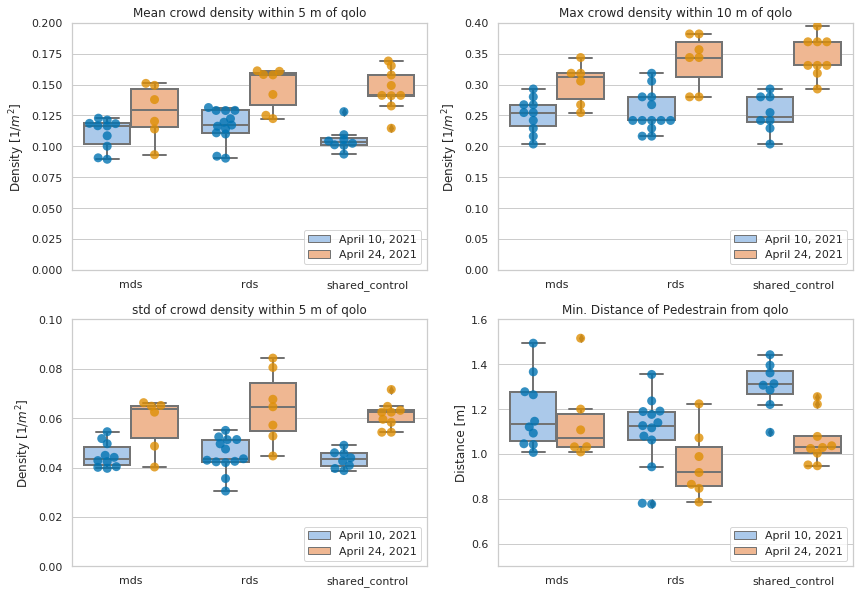

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

categorical_plot(
    axes=axes[0,0],
    df=crowd_metrics_df,
    metric='avg_crowd_density5',
    catogory='control_type',
    title='Mean crowd density within 5 m of qolo',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 0.20],
    kind='box',
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
)
categorical_plot(
    axes=axes[0,1],
    df=crowd_metrics_df,
    metric='max_crowd_density5',
    catogory='control_type',
    title='Max crowd density within 10 m of qolo',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 0.40],
    kind='box',
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
)

categorical_plot(
    axes=axes[1,0],
    df=crowd_metrics_df,
    metric='std_crowd_density5',
    catogory='control_type',
    title='std of crowd density within 5 m of qolo',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 0.1],
    kind='box',
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
)

categorical_plot(
    axes=axes[1,1],
    df=crowd_metrics_df,
    metric='avg_min_dist',
    catogory='control_type',
    title='Min. Distance of Pedestrain from qolo',
    xlabel='',
    ylabel='Distance [m]',
    ylim=[0.5, 1.6],
    kind='box',
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
)

plt.savefig("comp_crowd.pdf", dpi=300)

plt.show()

In [43]:
plt.close()

### Path Efficiency-related metrics

In [44]:
path_metrics_df = eval_res_df[['seq', 'control_type'] + list(path_metrics) + ['date']]

/home/crowdbot/miniconda3/envs/py38cuda110/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


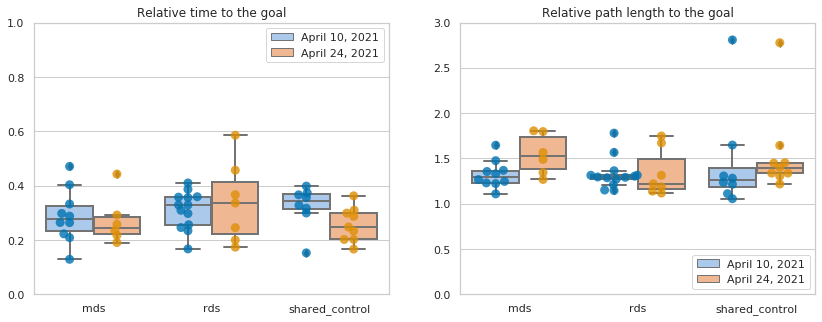

In [45]:
path_fig, path_axes = plt.subplots(1, 2, figsize=(14, 5))

categorical_plot(
    axes=path_axes[0],
    df=path_metrics_df,
    metric='rel_duration2goal',
    catogory='control_type',
    title='Relative time to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=path_axes[1],
    df=path_metrics_df,
    metric='rel_path_length2goal',
    catogory='control_type',
    title='Relative path length to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 3.0],
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    kind='box',
)

plt.savefig("comp_path_efficiency.pdf", dpi=300)

plt.show()

In [46]:
plt.close()

### Shared control-related metrics

In [47]:
control_metrics_df = eval_res_df[['seq', 'control_type'] + list(control_metrics) + ['date']]

/home/crowdbot/miniconda3/envs/py38cuda110/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/crowdbot/miniconda3/envs/py38cuda110/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/crowdbot/miniconda3/envs/py38cuda110/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/crowdbot/miniconda3/envs/py38cuda110/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

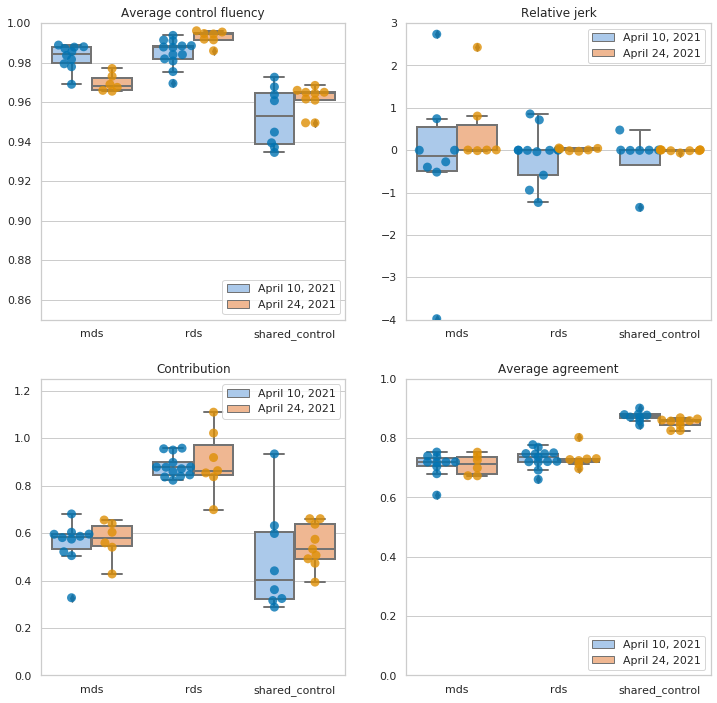

In [48]:
control_fig, control_axes = plt.subplots(2, 2, figsize=(12, 12))

categorical_plot(
    axes=control_axes[0,0],
    df=control_metrics_df,
    metric='avg_fluency',
    catogory='control_type',
    title='Average control fluency',
    xlabel='',
    ylabel='',
    ylim=[0.85, 1.0],
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    kind='box',
)

categorical_plot(
    axes=control_axes[0,1],
    df=control_metrics_df,
    metric='rel_jerk',
    catogory='control_type',
    title='Relative jerk',
    xlabel='',
    ylabel='',
    ylim=[-4.0, 3.0],
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,0],
    df=control_metrics_df,
    metric='contribution',
    catogory='control_type',
    title='Contribution',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.25],
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,1],
    df=control_metrics_df,
    metric='avg_agreement',
    catogory='control_type',
    title='Average agreement',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    lgd_labels=['April 10, 2021', 'April 24, 2021'],
    group='date',
    kind='box',
)

plt.savefig("comp_control.pdf", dpi=300)

plt.show()

In [49]:
plt.close()

### Analysis without group

In [50]:
crowd_metrics_df0424 = crowd_metrics_df[crowd_metrics_df.date=='0424'].sort_values('control_type', ascending=False)
print("Sequence on 0424")
print(crowd_metrics_df0424['control_type'].value_counts())

Sequence on 0424
shared_control    9
rds               7
mds               6
Name: control_type, dtype: int64


In [51]:
crowd_metrics_df0410 = crowd_metrics_df[crowd_metrics_df.date=='0410'].sort_values(by=['control_type'], ascending=False, ignore_index=True).reindex()
print("Sequence on 0410")
print(crowd_metrics_df0410['control_type'].value_counts())

Sequence on 0410
rds               13
mds               10
shared_control     8
Name: control_type, dtype: int64


In [52]:
crowd_metrics_df0410

,seq,control_type,avg_crowd_density5,std_crowd_density5,max_crowd_density5,avg_min_dist,date
0,2021-04-10-12-38-25,shared_control,0.093701,0.039633,0.203718,1.313308,0410
1,2021-04-10-12-36-29,shared_control,0.128057,0.049023,0.280113,1.096758,0410
2,2021-04-10-12-34-34,shared_control,0.104331,0.040868,0.254648,1.306562,0410
3,2021-04-10-12-32-32,shared_control,0.101227,0.045675,0.280113,1.220631,0410
4,2021-04-10-10-48-02,shared_control,0.105375,0.045984,0.241916,1.285623,0410
5,2021-04-10-10-45-02,shared_control,0.109428,0.042656,0.292845,1.361390,0410
6,2021-04-10-10-32-15,shared_control,0.100759,0.038778,0.229183,1.395437,0410
7,2021-04-10-10-25-43,shared_control,0.102487,0.043970,0.241916,1.442362,0410
8,2021-04-10-11-11-30,rds,0.122398,0.051295,0.280113,1.080168,0410
9,2021-04-10-12-26-08,rds,0.119508,0.042330,0.241916,1.191423,0410


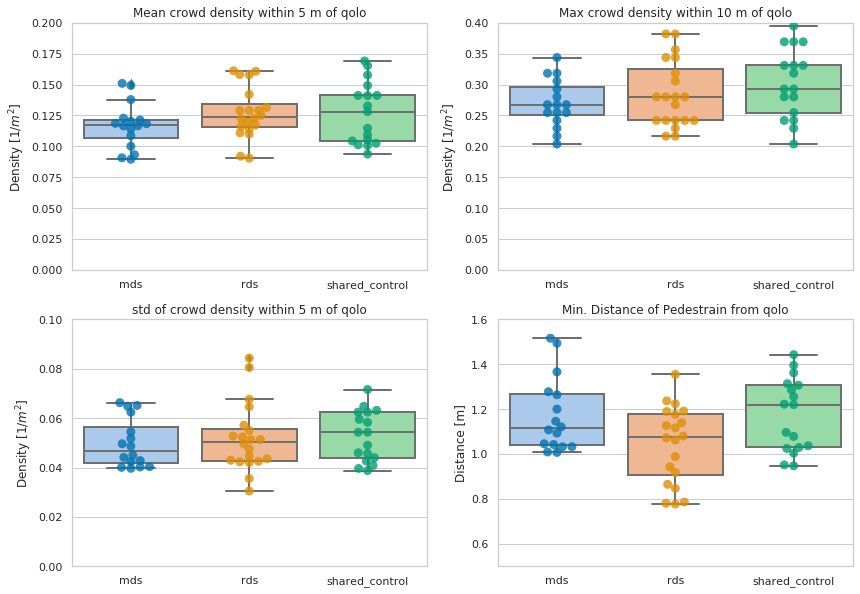

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

categorical_plot(
    axes=axes[0,0],
    df=crowd_metrics_df,
    metric='avg_crowd_density5',
    catogory='control_type',
    title='Mean crowd density within 5 m of qolo',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 0.20],
    kind='box',
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
)
categorical_plot(
    axes=axes[0,1],
    df=crowd_metrics_df,
    metric='max_crowd_density5',
    catogory='control_type',
    title='Max crowd density within 10 m of qolo',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 0.40],
    kind='box',
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
)

categorical_plot(
    axes=axes[1,0],
    df=crowd_metrics_df,
    metric='std_crowd_density5',
    catogory='control_type',
    title='std of crowd density within 5 m of qolo',
    xlabel='',
    ylabel='Density [1/$m^2$]',
    ylim=[0.0, 0.1],
    kind='box',
    # group='goal_reached',
    # lgd_labels=['Not reached', 'Reached'],
)

categorical_plot(
    axes=axes[1,1],
    df=crowd_metrics_df,
    metric='avg_min_dist',
    catogory='control_type',
    title='Min. Distance of Pedestrain from qolo',
    xlabel='',
    ylabel='Distance [m]',
    ylim=[0.5, 1.6],
    kind='box',
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
)

plt.savefig("comp_crowd_nogroup.pdf", dpi=300)

plt.show()

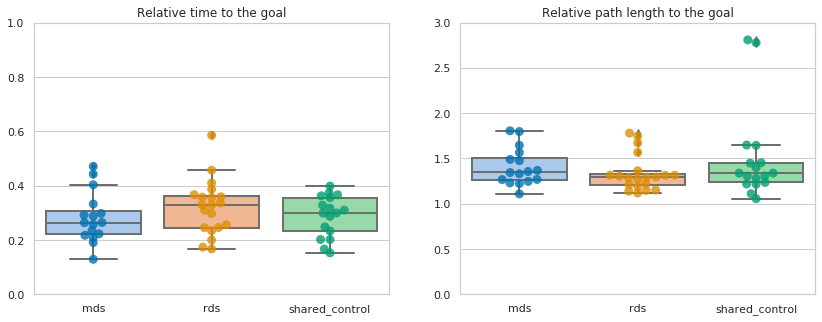

In [54]:
path_fig, path_axes = plt.subplots(1, 2, figsize=(14, 5))

categorical_plot(
    axes=path_axes[0],
    df=path_metrics_df,
    metric='rel_duration2goal',
    catogory='control_type',
    title='Relative time to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=path_axes[1],
    df=path_metrics_df,
    metric='rel_path_length2goal',
    catogory='control_type',
    title='Relative path length to the goal',
    xlabel='',
    ylabel='',
    ylim=[0.0, 3.0],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    kind='box',
)

plt.savefig("comp_path_efficiency_nogroup.pdf", dpi=300)

plt.show()

/home/crowdbot/miniconda3/envs/py38cuda110/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/crowdbot/miniconda3/envs/py38cuda110/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


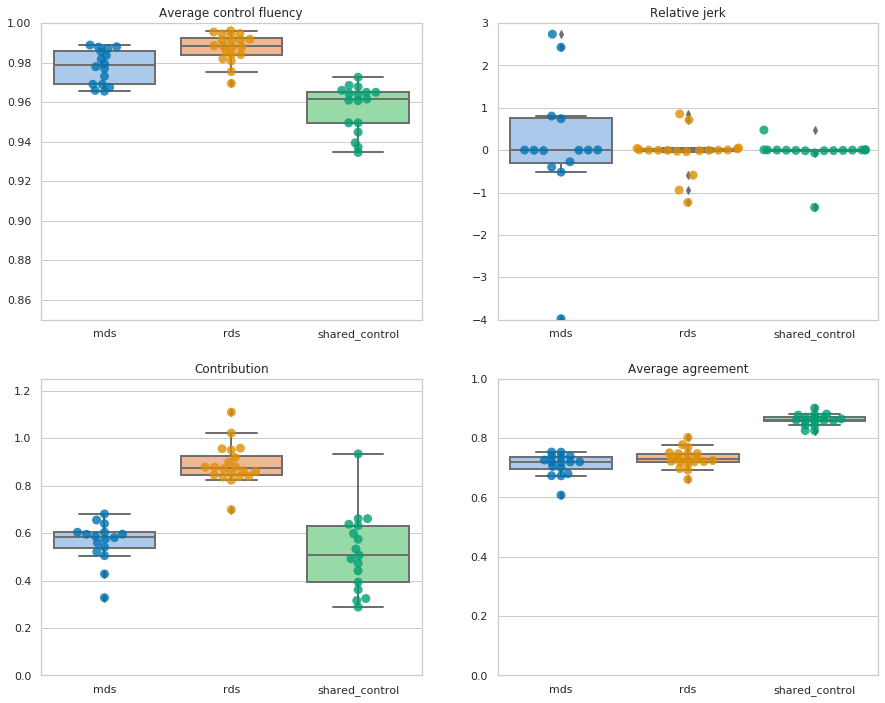

In [55]:
control_fig, control_axes = plt.subplots(2, 2, figsize=(15, 12))

categorical_plot(
    axes=control_axes[0,0],
    df=control_metrics_df,
    metric='avg_fluency',
    catogory='control_type',
    title='Average control fluency',
    xlabel='',
    ylabel='',
    ylim=[0.85, 1.0],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    kind='box',
)

categorical_plot(
    axes=control_axes[0,1],
    df=control_metrics_df,
    metric='rel_jerk',
    catogory='control_type',
    title='Relative jerk',
    xlabel='',
    ylabel='',
    ylim=[-4.0, 3.0],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,0],
    df=control_metrics_df,
    metric='contribution',
    catogory='control_type',
    title='Contribution',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.25],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,1],
    df=control_metrics_df,
    metric='avg_agreement',
    catogory='control_type',
    title='Average agreement',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    # lgd_labels=['April 10, 2021', 'April 24, 2021'],
    # group='date',
    kind='box',
)

plt.savefig("comp_control_nogroup.pdf", dpi=300)

plt.show()

## Comparison between shared_control on 0325, 0410 and 0424

In [56]:
chosen_dates = ['0410', '0424', '1203']
chosen_type = ['shared_control']

eval_dirs = []

for root, dirs, files in walk(outbase, topdown=False, maxdepth=1):
    for dir_ in dirs:
        if any(s in dir_ for s in chosen_dates) and any(s in dir_ for s in chosen_type):
            dir_ = dir_.replace("_processed", "")
            eval_dirs.append(dir_)
            print("{}/ is available!".format(dir_))

0410_shared_control/ is available!
0424_shared_control/ is available!
1203_shared_control/ is available!


### Result loading

In [57]:
crowd_metrics = (
    'avg_crowd_density5',
    'std_crowd_density5',
    'max_crowd_density5',
    'avg_min_dist',
)
"""
To added crowd_metrics
avg_crowd_density2_5
std_crowd_density2_5
max_crowd_density2_5
virtual_collision
"""

path_metrics = (
    'rel_duration2goal',
    'rel_path_length2goal',
    'path_length2goal',
    'duration2goal',
    'min_dist2goal',
)

control_metrics = (
    'rel_jerk',
    'avg_fluency',
    'contribution',
    'avg_agreement',
)

frames = []

for eval_dir in eval_dirs:

    # extract date
    date = eval_dir[:4]
    control_type = eval_dir[5:]

    print("Reading results from {}".format(eval_dir))

    # new a CrowdBotDatabase() instance
    eval_database = CrowdBotDatabase(classdir=eval_dir)

    eval_dict = {'seq': eval_database.seqs}
    eval_dict.update(
        {'control_type': [control_type for i in range(eval_database.nr_seqs())]}
    )

    eval_dict.update({k: [] for k in crowd_metrics})
    eval_dict.update({k: [] for k in path_metrics})
    eval_dict.update({k: [] for k in control_metrics})

    for idx, seq in enumerate(eval_database.seqs):
        eval_res_dir = os.path.join(eval_database.metrics_dir)

        crowd_eval_npy = os.path.join(eval_res_dir, seq + "_crowd_eval.npy")
        crowd_eval_dict = np.load(
            crowd_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(crowd_metrics):
            eval_dict[crowd_metrics[iidx]].append(crowd_eval_dict[val])

        path_eval_npy = os.path.join(eval_res_dir, seq + "_path_eval.npy")
        path_eval_dict = np.load(
            path_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(path_metrics):
            eval_dict[path_metrics[iidx]].append(path_eval_dict[val])

        qolo_eval_npy = os.path.join(eval_res_dir, seq + "_qolo_eval.npy")
        qolo_eval_dict = np.load(
            qolo_eval_npy,
            allow_pickle=True,
        ).item()
        for iidx, val in enumerate(control_metrics):
            eval_dict[control_metrics[iidx]].append(qolo_eval_dict[val])

    eval_df = pd.DataFrame(eval_dict)
    eval_df.columns = (
        ['seq', 'control_type']
        + list(crowd_metrics)
        + list(path_metrics)
        + list(control_metrics)
    )

    # Filter path_length2goal less than 5 meter
    eval_df = eval_df[eval_df.path_length2goal >= 5.0]
    # add date col
    eval_df['date'] = [date] * len(eval_df)

    frames.append(eval_df)

eval_res_df = pd.concat(frames, ignore_index=True)

Reading results from 0410_shared_control
Reading results from 0424_shared_control
Reading results from 1203_shared_control


### Shared control metrics

In [58]:
control_metrics_df = eval_res_df[['seq', 'control_type'] + list(control_metrics) + ['date']]

/home/crowdbot/miniconda3/envs/py38cuda110/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


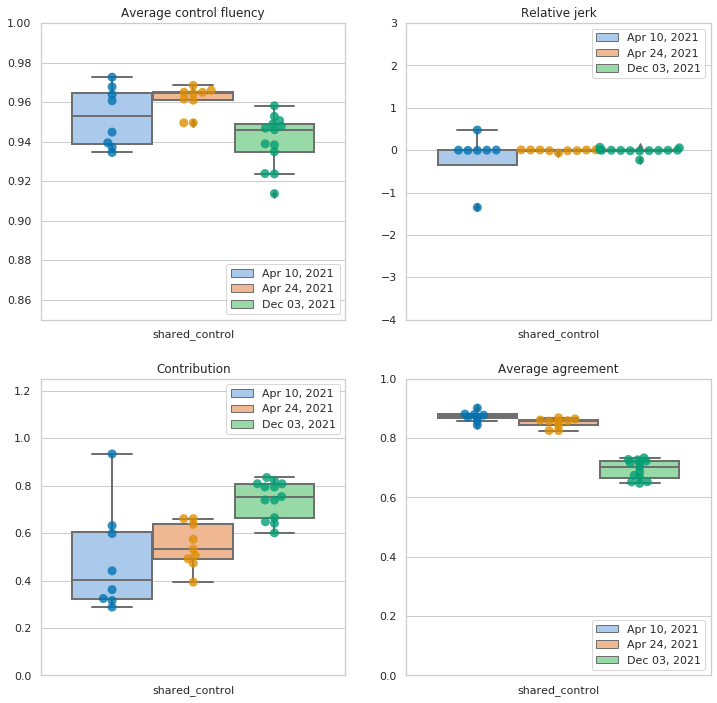

In [59]:
control_fig, control_axes = plt.subplots(2, 2, figsize=(12, 12))

categorical_plot(
    axes=control_axes[0,0],
    df=control_metrics_df,
    metric='avg_fluency',
    catogory='control_type',
    title='Average control fluency',
    xlabel='',
    ylabel='',
    ylim=[0.85, 1.0],
    lgd_labels=['Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    kind='box',
)

categorical_plot(
    axes=control_axes[0,1],
    df=control_metrics_df,
    metric='rel_jerk',
    catogory='control_type',
    title='Relative jerk',
    xlabel='',
    ylabel='',
    ylim=[-4.0, 3.0],
    lgd_labels=['Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,0],
    df=control_metrics_df,
    metric='contribution',
    catogory='control_type',
    title='Contribution',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.25],
    lgd_labels=['Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    loc='upper right',
    kind='box',
)

categorical_plot(
    axes=control_axes[1,1],
    df=control_metrics_df,
    metric='avg_agreement',
    catogory='control_type',
    title='Average agreement',
    xlabel='',
    ylabel='',
    ylim=[0.0, 1.0],
    lgd_labels=['Apr 10, 2021', 'Apr 24, 2021', 'Dec 03, 2021'],
    group='date',
    kind='box',
)

plt.savefig("comp_shared_control.pdf", dpi=300)

plt.show()